<a href="https://colab.research.google.com/github/ALDO12062004/EDP1/blob/main/Problemas%20de%20Sturm-Liouville%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EJERCICIO 1

Resolver la ecuación diferencial $$x''+kx=0$$ con condiciones de frontera $$x(0)=x(1)=0$$

Llamamos las librerias de Sympy y Numpy, esto para la resolución de la EDO.\
Definimos las variables y funciones que serán utilizadas para la solución

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, pi, sin, dsolve, Eq, Function, solve, lambdify

t = symbols('t')
k = symbols('k', positive=True)
C1,C2 = symbols('C1 C2')
x = Function('x')

Escribimos la EDO, resolvemos la ecuación con la función dsolve e imprimos la solución general.

In [3]:
gen_sol = dsolve(Eq(x(t).diff(t, 2) + k * x(t), 0), x(t))

print("Solución general:")
print(gen_sol)

Solución general:
Eq(x(t), C1*sin(sqrt(k)*t) + C2*cos(sqrt(k)*t))


Escribimos las condiciones de frontera y se evaluán sobre ellas.

In [4]:
bc_1 = gen_sol.rhs.subs(t, 0)
C2_value = solve(bc_1, C2)[0]

bc_2 = gen_sol.rhs.subs(t, 1)
bc_2_substituted = bc_2.subs(C2, C2_value)

Se calculan los demás valores de $k$ de la evaluación de las condiciones de frontera.

In [5]:
k_values = solve(bc_2_substituted, k)
print(f"Los valores posibles de k son: {k_values}")

Los valores posibles de k son: [pi**2]


Se imprime la solución de la EDO aplicando las condiciones de frontera

In [10]:
final_sol = gen_sol.rhs.subs(k, k_values[0])

f_final_sol = final_sol.subs(C2, C2_value)
print("Solución final con las condiciones de frontera x(0) = 0 y x(1) = 0:")
print(f"x(t) = {f_final_sol}")

Solución final con las condiciones de frontera x(0) = 0 y x(1) = 0:
x(t) = C1*sin(pi*t)


Ahora vamos a graficar algunas soluciones de la EDO.\
Usamos numpy para poder graficar y hacemos un ciclo for para ver distintas graficas vareando $C_1$

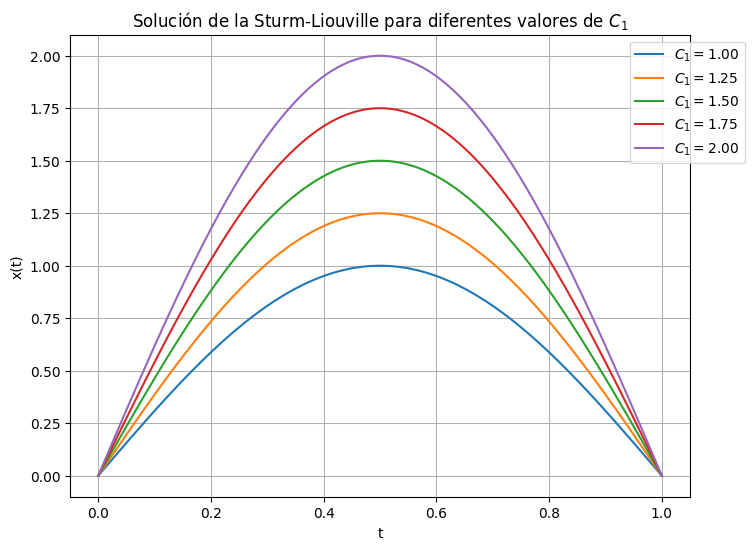

In [11]:
# Convertir la expresión de SymPy a una función de Numpy para gráficar
f_final_sol = lambdify((t, C1), f_final_sol, "numpy")

t_vals = np.linspace(0, 1, 400)

plt.figure(figsize=(8, 6))


for C1_value in np.linspace(1, 2, 5):
    x_vals = f_final_sol(t_vals, C1_value)

    label = r'$C_1 = {:.2f}$'.format(C1_value)

    plt.plot(t_vals, x_vals, label=label)

plt.title('Solución de la Sturm-Liouville para diferentes valores de $C_1$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()

##EJERCICIO  2

Resolver la ecuación diferencial $$x''+kx=0$$ con condiciones de frontera $$x'(0)=x'(1)=0$$

Llamamos las librerias de Sympy y Numpy, esto para la resolución de la EDO.\
Definimos las variables y funciones que serán utilizadas para la solución

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, pi, sin, dsolve, Eq, Function, solve, lambdify

t = symbols('t')
k = symbols('k', positive=True)
C1, C2 = symbols('C1 C2')
x = Function('x')

Derivamos la solución general, para poder aplicar las condicones de frontera

In [12]:
gen_sol = dsolve(Eq(x(t).diff(t, 2) + k * x(t), 0), x(t))

deriv_gen_sol = gen_sol.rhs.diff(t)
print("\nDerivada de la solución general (x'(t)):")
print(deriv_gen_sol)


Derivada de la solución general (x'(t)):
C1*sqrt(k)*cos(sqrt(k)*t) - C2*sqrt(k)*sin(sqrt(k)*t)


Evaluamos las condiciones de frontera en la solución

In [ ]:
bc_1 = deriv_gen_sol.subs(t, 0)

C1_value = solve(bc_1, C1)[0]
print(f"De la condición en t = 0, obtenemos: C1 = {C1_value}")

bc_2 = deriv_gen_sol.subs(t, 1)
bc_2_substituted = bc_2.subs(C1, C1_value)

De la condición en t = 0, obtenemos: C1 = 0


Se calculan los demás valores de  𝑘  de la evaluación de las condiciones de frontera.

In [ ]:
k_values = solve(bc_2_substituted, k)
print(f"Los valores posibles de k son: {k_values}")

Los valores posibles de k son: [pi**2]


Se imprime la solución de la EDO aplicando las condiciones de frontera

In [ ]:
final_sol = gen_sol.rhs.subs({C1: C1_value, k: k_values[0]})

print("Solución general con las condiciones x'(0) = 0 y x'(1) = 0:")
print(f"x(t) = {final_sol}")

Solución general con las condiciones x'(0) = 0 y x'(1) = 0:
x(t) = C2*cos(pi*t)


Ahora vamos a graficar algunas soluciones de la EDO.\
Usamos numpy para poder graficar y hacemos un ciclo for para ver distintas graficas vareando $C_2$

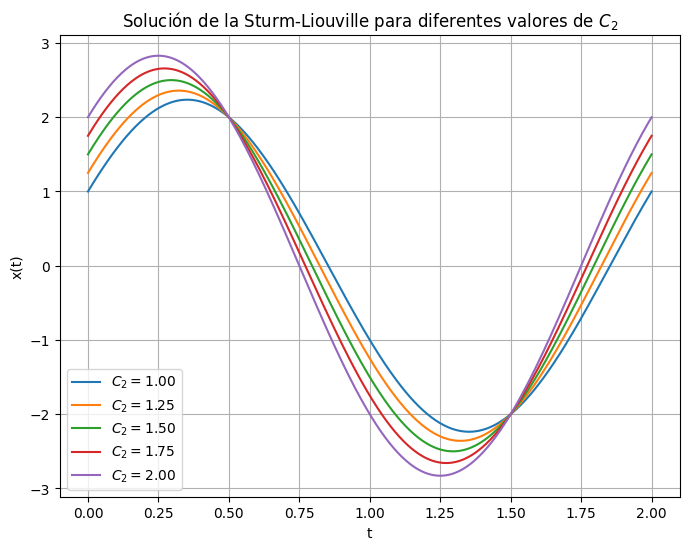

In [17]:
final_sol_with_C2 = gen_sol.rhs.subs({C1: C1_value, k: k_values[0]})

# Convertir la expresión de SymPy a una función de Numpy para graficar
f_final_sol_C2 = lambdify((t, C2), final_sol_with_C2, "numpy")

t_vals = np.linspace(0, 2, 400)

plt.figure(figsize=(8, 6))

labels = []

# Graficar para varios valores de C2
for C2_value in np.linspace(1, 2, 5):
    x_vals = f_final_sol_C2(t_vals, C2_value)

    label = r'$C_2 = {:.2f}$'.format(C2_value)
    labels.append(label)

    plt.plot(t_vals, x_vals, label=label)

plt.title('Solución de la Sturm-Liouville para diferentes valores de $C_2$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend(labels)

plt.show()